<center>
    <h1>Pattern Analysis | SS20</h1>
    <hr>
    <br>
    <div style="margin:0 60px 0px 0">
        <img src="imgs/pat.jpg" width=200px align=center>
    </div>
    <h3>Exercises for </h3>
    <h2>Pattern Analysis Programming</h2>
    <br>
</center>

# Dimensionality Reduction

`Task 4: May 10 – June 17`

- [Exercise 1 - Dimensionality Reduction](#1) 
    - [Exercise 1a - One Gauss   3D to 2D](#1.1) 
    - [Exercise 1b - Multi Gauss 2D to 1D](#1.2) 
    - [Exercise 1c - Multi Gauss 3D to 2D](#1.3) 
    - [Exercise 1d - Two circles 2D to 1D](#1.4) 
    - [Exercise 1e - Swiss roll  3D to 2D](#1.5) 
    - [Exercise 1f - Iris Dataset](#1.6)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D 
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs, make_circles, make_swiss_roll
from sklearn.datasets import load_iris
from sklearn.manifold import Isomap, SpectralEmbedding, MDS

from scipy import linalg

np.random.seed(42)

<a name='1'></a>

# Exercise 1 Dimensionality Reduction

<a name='1.1'></a>

## Exercise 1a) One Gauss 2D to 1D

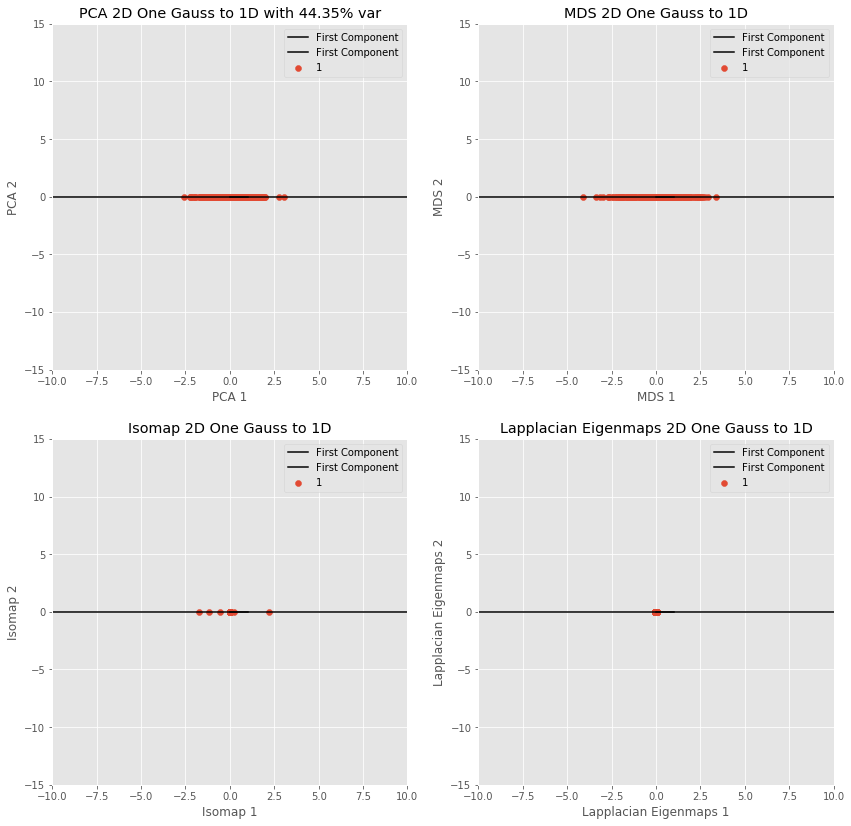

In [2]:
# Dataset
X, y = make_blobs(n_samples=150, centers=1, n_features=3, random_state=0)

xaxis = 10
yaxis = 15

# Manifolds
pca = PCA(1)
var = pca.fit(X)
z_pca = var.transform(X)

mds = MDS(1)
z_mds = mds.fit_transform(X)

iso = Isomap(1)
z_iso = iso.fit_transform(X)

spec = SpectralEmbedding(1)
z_spec = spec.fit_transform(X)

# Figure
plt.style.use('ggplot')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(14,14))

# PCA
ax1.scatter(z_pca[:,0], np.zeros(150), label='1')
ax1.plot((-xaxis, xaxis), (0, 0), (0, 0), c='black', label="First Component")
ax1.legend(loc='upper right')
ax1.set_title("PCA 2D One Gauss to 1D with {}% var".format(round(var.explained_variance_ratio_[0]*100, 2)))
ax1.set_xlabel('PCA 1')
ax1.set_ylabel('PCA 2')
ax1.set_xlim(-xaxis, xaxis)
ax1.set_ylim(-yaxis, yaxis)

# MDS
ax2.scatter(z_mds[:,0], np.zeros(150), label='1')
ax2.plot((-xaxis, xaxis), (0, 0), (0, 0), c='black', label="First Component")
ax2.legend(loc='upper right')
ax2.set_title("MDS 2D One Gauss to 1D")
ax2.set_xlabel('MDS 1')
ax2.set_ylabel('MDS 2')    
ax2.set_xlim(-xaxis, xaxis)
ax2.set_ylim(-yaxis, yaxis)

# ISO
ax3.scatter(z_iso[:,0], np.zeros(150), label='1')
ax3.plot((-xaxis, xaxis), (0, 0), (0, 0), c='black', label="First Component")
ax3.legend(loc='upper right')
ax3.set_title("Isomap 2D One Gauss to 1D")
ax3.set_xlabel('Isomap 1')
ax3.set_ylabel('Isomap 2')    
ax3.set_xlim(-xaxis, xaxis)
ax3.set_ylim(-yaxis, yaxis)

# Laplcian Eigenmaps
ax4.scatter(z_spec[:,0], np.zeros(150), label='1')
ax4.plot((-xaxis, xaxis), (0, 0), (0, 0), c='black', label="First Component")
ax4.legend(loc='upper right')
ax4.set_title("Lapplacian Eigenmaps 2D One Gauss to 1D")
ax4.set_xlabel('Lapplacian Eigenmaps 1')
ax4.set_ylabel('Lapplacian Eigenmaps 2')    
ax4.set_xlim(-xaxis, xaxis)
ax4.set_ylim(-yaxis, yaxis)    

plt.show()

<a name='1.2'></a>

## Exercise 1b) Multidimensional Gauss 2D to 1D

/Users/timloehr/anaconda3/envs/datascience_projects/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


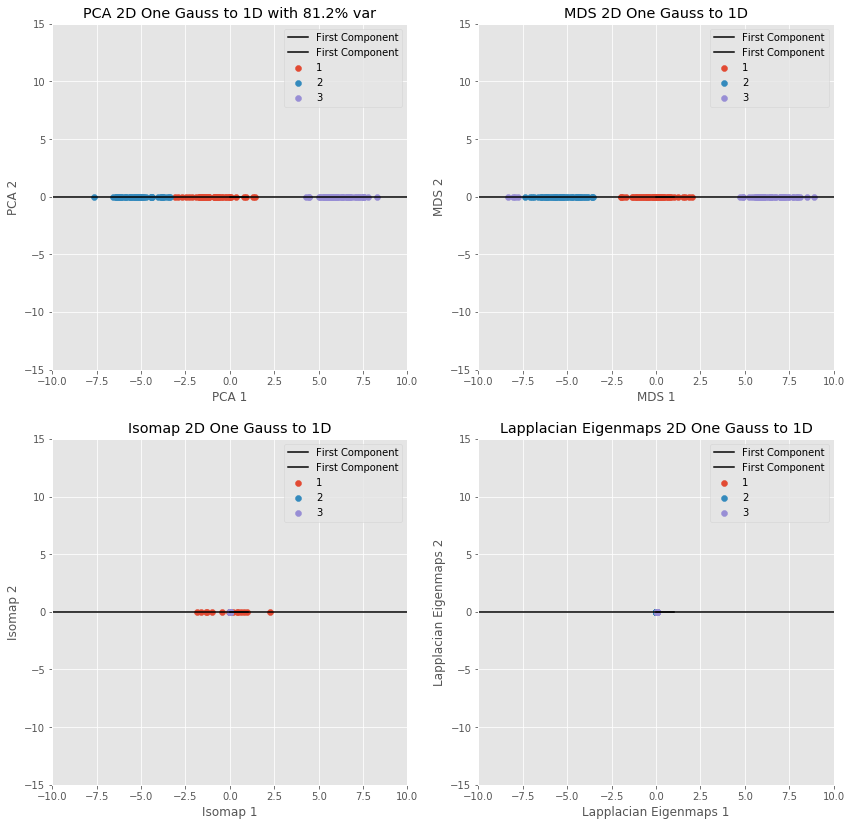

In [3]:
# Dataset
X, y = make_blobs(n_samples=150, centers=3, n_features=3, random_state=0)

xaxis = 10
yaxis = 15

# Manifolds
pca = PCA(1)
var = pca.fit(X)
z_pca = var.transform(X)

mds = MDS(1)
z_mds = mds.fit_transform(X)

iso = Isomap(1)
z_iso = iso.fit_transform(X)

spec = SpectralEmbedding(1)
z_spec = spec.fit_transform(X)

# Figure
plt.style.use('ggplot')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(14,14))

# PCA
ax1.scatter(z_pca[y == 0][:,0], np.zeros(len(X[y == 0])), label='1')
ax1.scatter(z_pca[y == 1][:,0], np.zeros(len(X[y == 1])), label='2')
ax1.scatter(z_pca[y == 2][:,0], np.zeros(len(X[y == 2])), label='3')
ax1.plot((-xaxis, xaxis), (0, 0), (0, 0), c='black', label="First Component")
ax1.legend(loc='upper right')
ax1.set_title("PCA 2D One Gauss to 1D with {}% var".format(round(var.explained_variance_ratio_[0]*100, 2)))
ax1.set_xlabel('PCA 1')
ax1.set_ylabel('PCA 2')
ax1.set_xlim(-xaxis, xaxis)
ax1.set_ylim(-yaxis, yaxis)

# MDS
ax2.scatter(z_mds[y == 0][:,0], np.zeros(len(X[y == 0])), label='1')
ax2.scatter(z_mds[y == 1][:,0], np.zeros(len(X[y == 1])), label='2')
ax2.scatter(z_mds[y == 2][:,0], np.zeros(len(X[y == 2])), label='3')
ax2.plot((-xaxis, xaxis), (0, 0), (0, 0), c='black', label="First Component")
ax2.legend(loc='upper right')
ax2.set_title("MDS 2D One Gauss to 1D")
ax2.set_xlabel('MDS 1')
ax2.set_ylabel('MDS 2')    
ax2.set_xlim(-xaxis, xaxis)
ax2.set_ylim(-yaxis, yaxis)

# ISO
ax3.scatter(z_iso[y == 0][:,0], np.zeros(len(X[y == 0])), label='1')
ax3.scatter(z_iso[y == 1][:,0], np.zeros(len(X[y == 1])), label='2')
ax3.scatter(z_iso[y == 2][:,0], np.zeros(len(X[y == 2])), label='3')
ax3.plot((-xaxis, xaxis), (0, 0), (0, 0), c='black', label="First Component")
ax3.legend(loc='upper right')
ax3.set_title("Isomap 2D One Gauss to 1D")
ax3.set_xlabel('Isomap 1')
ax3.set_ylabel('Isomap 2')    
ax3.set_xlim(-xaxis, xaxis)
ax3.set_ylim(-yaxis, yaxis)

# Laplcian Eigenmaps
ax4.scatter(z_spec[y == 0][:,0], np.zeros(len(X[y == 0])), label='1')
ax4.scatter(z_spec[y == 1][:,0], np.zeros(len(X[y == 1])), label='2')
ax4.scatter(z_spec[y == 2][:,0], np.zeros(len(X[y == 2])), label='3')
ax4.plot((-xaxis, xaxis), (0, 0), (0, 0), c='black', label="First Component")
ax4.legend(loc='upper right')
ax4.set_title("Lapplacian Eigenmaps 2D One Gauss to 1D")
ax4.set_xlabel('Lapplacian Eigenmaps 1')
ax4.set_ylabel('Lapplacian Eigenmaps 2')    
ax4.set_xlim(-xaxis, xaxis)
ax4.set_ylim(-yaxis, yaxis)    

plt.show()

<a name='1.3'></a>

## Exercise 1c) Multidimensional Gauss 3D to 2D

/Users/timloehr/anaconda3/envs/datascience_projects/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


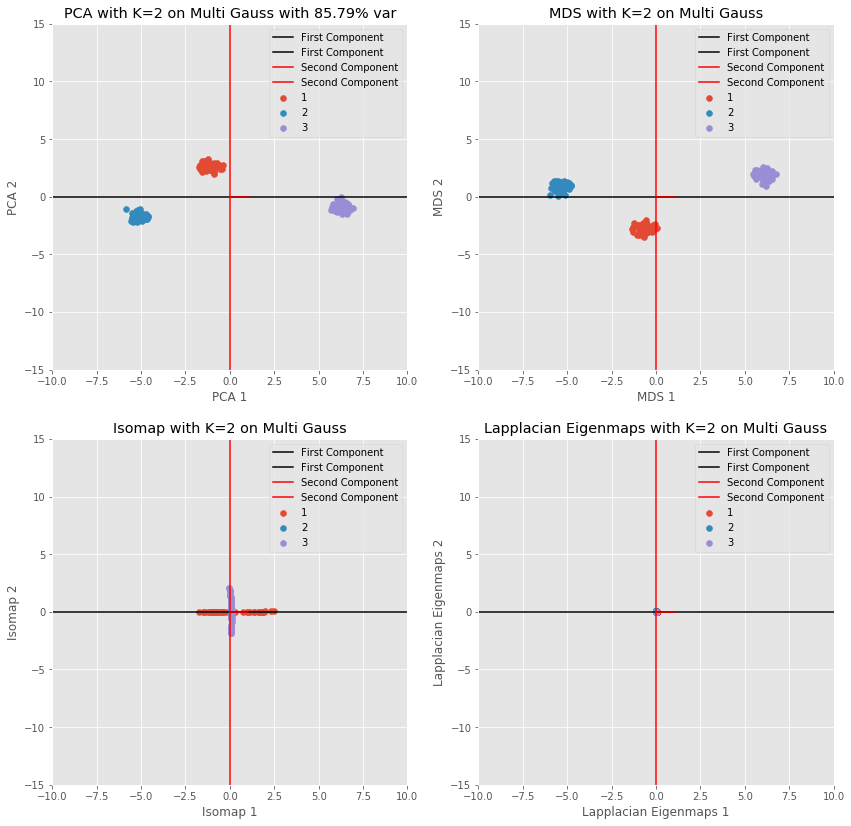

In [4]:
# Dataset
X, y = make_blobs(n_samples=150, centers=3, n_features=3, random_state=0, cluster_std=0.3)

xaxis = 10
yaxis = 15

# Manifolds
pca = PCA(2)
var = pca.fit(X)
z_pca = var.transform(X)

mds = MDS(2)
z_mds = mds.fit_transform(X)

iso = Isomap(2)
z_iso = iso.fit_transform(X)

spec = SpectralEmbedding(2)
z_spec = spec.fit_transform(X)

# Figure
plt.style.use('ggplot')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(14,14))

# PCA
ax1.scatter(z_pca[y == 0][:,0], z_pca[y == 0][:,1], label='1')
ax1.scatter(z_pca[y == 1][:,0], z_pca[y == 1][:,1], label='2')
ax1.scatter(z_pca[y == 2][:, 0], z_pca[y == 2][:,1], label='3')
ax1.plot((-xaxis, xaxis), (0, 0), (0, 0), c='black', label="First Component")
ax1.plot((0, 0),(-yaxis, yaxis), (0, 0), c='red', label="Second Component")
ax1.legend(loc='upper right')
ax1.set_title("PCA with K=2 on Multi Gauss with {}% var".format(round(var.explained_variance_ratio_[0]*100, 2)))
ax1.set_xlabel('PCA 1')
ax1.set_ylabel('PCA 2')
ax1.set_xlim(-xaxis, xaxis)
ax1.set_ylim(-yaxis, yaxis)

# MDS
ax2.scatter(z_mds[y == 0][:,0], z_mds[y == 0][:,1], label='1')
ax2.scatter(z_mds[y == 1][:,0], z_mds[y == 1][:,1], label='2')
ax2.scatter(z_mds[y == 2][:, 0], z_mds[y == 2][:,1], label='3')
ax2.plot((-xaxis, xaxis), (0, 0), (0, 0), c='black', label="First Component")
ax2.plot((0, 0),(-yaxis, yaxis), (0, 0), c='red', label="Second Component")
ax2.legend(loc='upper right')
ax2.set_title("MDS with K=2 on Multi Gauss")
ax2.set_xlabel('MDS 1')
ax2.set_ylabel('MDS 2')    
ax2.set_xlim(-xaxis, xaxis)
ax2.set_ylim(-yaxis, yaxis)

# ISO
ax3.scatter(z_iso[y == 0][:,0], z_iso[y == 0][:,1], label='1')
ax3.scatter(z_iso[y == 1][:,0], z_iso[y == 1][:,1], label='2')
ax3.scatter(z_iso[y == 2][:, 0], z_iso[y == 2][:,1], label='3')
ax3.plot((-xaxis, xaxis), (0, 0), (0, 0), c='black', label="First Component")
ax3.plot((0, 0),(-yaxis, yaxis), (0, 0), c='red', label="Second Component")
ax3.legend(loc='upper right')
ax3.set_title("Isomap with K=2 on Multi Gauss")
ax3.set_xlabel('Isomap 1')
ax3.set_ylabel('Isomap 2')    
ax3.set_xlim(-xaxis, xaxis)
ax3.set_ylim(-yaxis, yaxis)

# Laplcian Eigenmaps
ax4.scatter(z_spec[y == 0][:,0], z_spec[y == 0][:,1], label='1')
ax4.scatter(z_spec[y == 1][:,0], z_spec[y == 1][:,1], label='2')
ax4.scatter(z_spec[y == 2][:, 0], z_spec[y == 2][:,1], label='3')
ax4.plot((-xaxis, xaxis), (0, 0), (0, 0), c='black', label="First Component")
ax4.plot((0, 0),(-yaxis, yaxis), (0, 0), c='red', label="Second Component")
ax4.legend(loc='upper right')
ax4.set_title("Lapplacian Eigenmaps with K=2 on Multi Gauss")
ax4.set_xlabel('Lapplacian Eigenmaps 1')
ax4.set_ylabel('Lapplacian Eigenmaps 2')    
ax4.set_xlim(-xaxis, xaxis)
ax4.set_ylim(-yaxis, yaxis)    

plt.show()

<a name='1.4'></a>

## Exercise 1d) Make Circles 2D to 1D

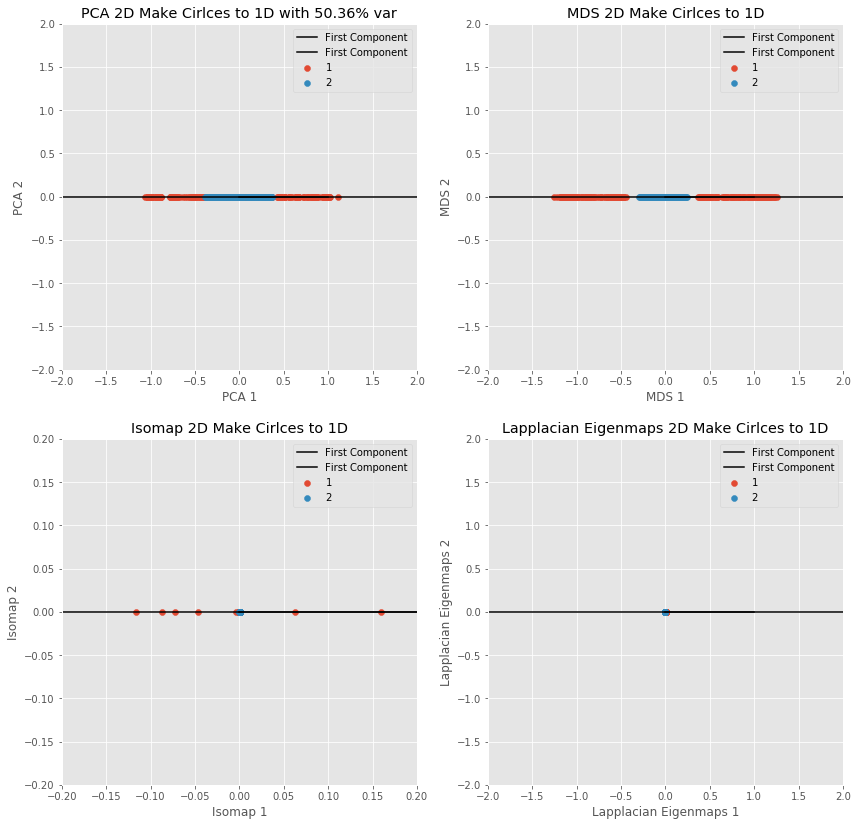

In [5]:
# Dataset
X, y = make_circles(n_samples=400, factor=.3, noise=.05, random_state=0)

xaxis = 2
yaxis = 2

# Manifolds
pca = PCA(1)
var = pca.fit(X)
z_pca = var.transform(X)

mds = MDS(1)
z_mds = mds.fit_transform(X)

iso = Isomap(1)
z_iso = iso.fit_transform(X)

spec = SpectralEmbedding(1)
z_spec = spec.fit_transform(X)

# Figure
plt.style.use('ggplot')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(14,14))

# PCA
ax1.scatter(z_pca[y == 0][:,0], np.zeros(len(X[y == 0])), label='1')
ax1.scatter(z_pca[y == 1][:,0], np.zeros(len(X[y == 1])), label='2')
ax1.plot((-xaxis, xaxis), (0, 0), (0, 0), c='black', label="First Component")
ax1.legend(loc='upper right')
ax1.set_title("PCA 2D Make Cirlces to 1D with {}% var".format(round(var.explained_variance_ratio_[0]*100, 2)))
ax1.set_xlabel('PCA 1')
ax1.set_ylabel('PCA 2')
ax1.set_xlim(-xaxis, xaxis)
ax1.set_ylim(-yaxis, yaxis)

# MDS
ax2.scatter(z_mds[y == 0][:,0], np.zeros(len(X[y == 0])), label='1')
ax2.scatter(z_mds[y == 1][:,0], np.zeros(len(X[y == 1])), label='2')
ax2.plot((-xaxis, xaxis), (0, 0), (0, 0), c='black', label="First Component")
ax2.legend(loc='upper right')
ax2.set_title("MDS 2D Make Cirlces to 1D")
ax2.set_xlabel('MDS 1')
ax2.set_ylabel('MDS 2')    
ax2.set_xlim(-xaxis, xaxis)
ax2.set_ylim(-yaxis, yaxis)

# ISO
ax3.scatter(z_iso[y == 0][:,0], np.zeros(len(X[y == 0])), label='1')
ax3.scatter(z_iso[y == 1][:,0], np.zeros(len(X[y == 1])), label='2')
ax3.plot((-xaxis, xaxis), (0, 0), (0, 0), c='black', label="First Component")
ax3.legend(loc='upper right')
ax3.set_title("Isomap 2D Make Cirlces to 1D")
ax3.set_xlabel('Isomap 1')
ax3.set_ylabel('Isomap 2')    
ax3.set_xlim(-0.2, 0.2)
ax3.set_ylim(-0.2, 0.2)

# Laplcian Eigenmaps
ax4.scatter(z_spec[y == 0][:,0], np.zeros(len(X[y == 0])), label='1')
ax4.scatter(z_spec[y == 1][:,0], np.zeros(len(X[y == 1])), label='2')
ax4.plot((-xaxis, xaxis), (0, 0), (0, 0), c='black', label="First Component")
ax4.legend(loc='upper right')
ax4.set_title("Lapplacian Eigenmaps 2D Make Cirlces to 1D")
ax4.set_xlabel('Lapplacian Eigenmaps 1')
ax4.set_ylabel('Lapplacian Eigenmaps 2')    
ax4.set_xlim(-xaxis, xaxis)
ax4.set_ylim(-yaxis, yaxis)    

plt.show()

<a name='1.5'></a>

## Exercise 1e) Make Swiss Roll 3D to 2D

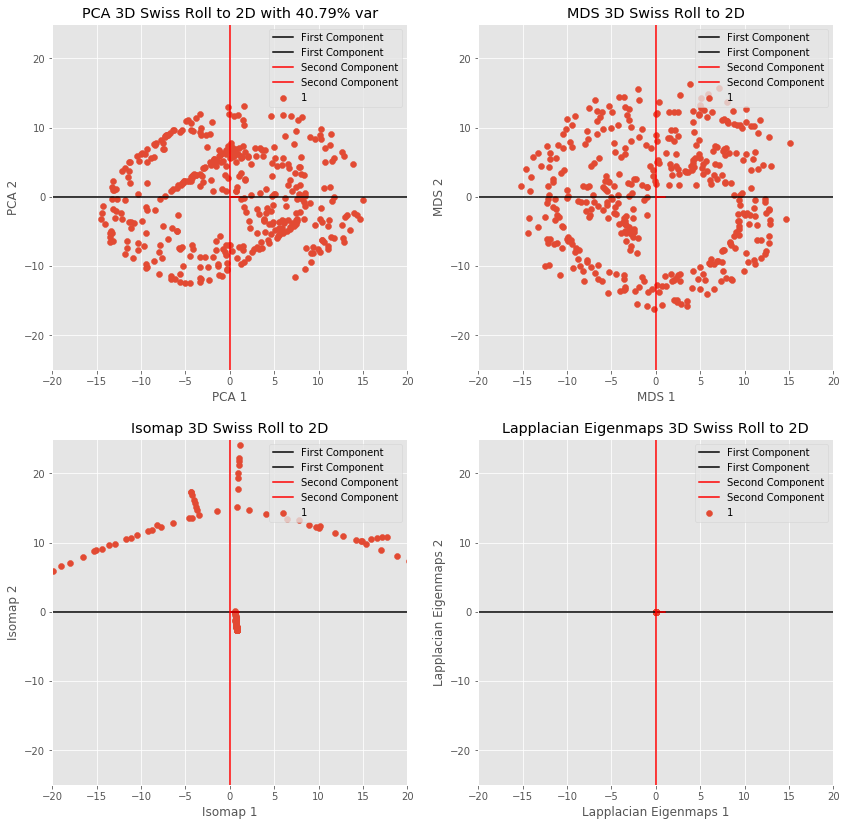

In [6]:
# Dataset
X, y = make_swiss_roll(n_samples=400)

xaxis = 20
yaxis = 25

# Manifolds
pca = PCA(2)
var = pca.fit(X)
z_pca = var.transform(X)

mds = MDS(2)
z_mds = mds.fit_transform(X)

iso = Isomap(2)
z_iso = iso.fit_transform(X)

spec = SpectralEmbedding(2)
z_spec = spec.fit_transform(X)

# Figure
plt.style.use('ggplot')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(14,14))

# PCA
ax1.scatter(z_pca[:,0], z_pca[:,1], label='1')
ax1.plot((-xaxis, xaxis), (0, 0), (0, 0), c='black', label="First Component")
ax1.plot((0, 0),(-yaxis, yaxis), (0, 0), c='red', label="Second Component")
ax1.legend(loc='upper right')
ax1.set_title("PCA 3D Swiss Roll to 2D with {}% var".format(round(var.explained_variance_ratio_[0]*100, 2)))
ax1.set_xlabel('PCA 1')
ax1.set_ylabel('PCA 2')
ax1.set_xlim(-xaxis, xaxis)
ax1.set_ylim(-yaxis, yaxis)

# MDS
ax2.scatter(z_mds[:,0], z_mds[:,1], label='1')
ax2.plot((-xaxis, xaxis), (0, 0), (0, 0), c='black', label="First Component")
ax2.plot((0, 0),(-yaxis, yaxis), (0, 0), c='red', label="Second Component")
ax2.legend(loc='upper right')
ax2.set_title("MDS 3D Swiss Roll to 2D")
ax2.set_xlabel('MDS 1')
ax2.set_ylabel('MDS 2')    
ax2.set_xlim(-xaxis, xaxis)
ax2.set_ylim(-yaxis, yaxis)

# ISO
ax3.scatter(z_iso[:,0], z_iso[:,1], label='1')
ax3.plot((-xaxis, xaxis), (0, 0), (0, 0), c='black', label="First Component")
ax3.plot((0, 0),(-yaxis, yaxis), (0, 0), c='red', label="Second Component")
ax3.legend(loc='upper right')
ax3.set_title("Isomap 3D Swiss Roll to 2D")
ax3.set_xlabel('Isomap 1')
ax3.set_ylabel('Isomap 2')    
ax3.set_xlim(-xaxis, xaxis)
ax3.set_ylim(-yaxis, yaxis)

# Laplcian Eigenmaps
ax4.scatter(z_spec[:,0], z_spec[:,1], label='1')
ax4.plot((-xaxis, xaxis), (0, 0), (0, 0), c='black', label="First Component")
ax4.plot((0, 0),(-yaxis, yaxis), (0, 0), c='red', label="Second Component")
ax4.legend(loc='upper right')
ax4.set_title("Lapplacian Eigenmaps 3D Swiss Roll to 2D")
ax4.set_xlabel('Lapplacian Eigenmaps 1')
ax4.set_ylabel('Lapplacian Eigenmaps 2')    
ax4.set_xlim(-xaxis, xaxis)
ax4.set_ylim(-yaxis, yaxis)    

plt.show()

<a name='1.6'></a>

## Exercise 1f) Iris Datset

## 4D to 2D

/Users/timloehr/anaconda3/envs/datascience_projects/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


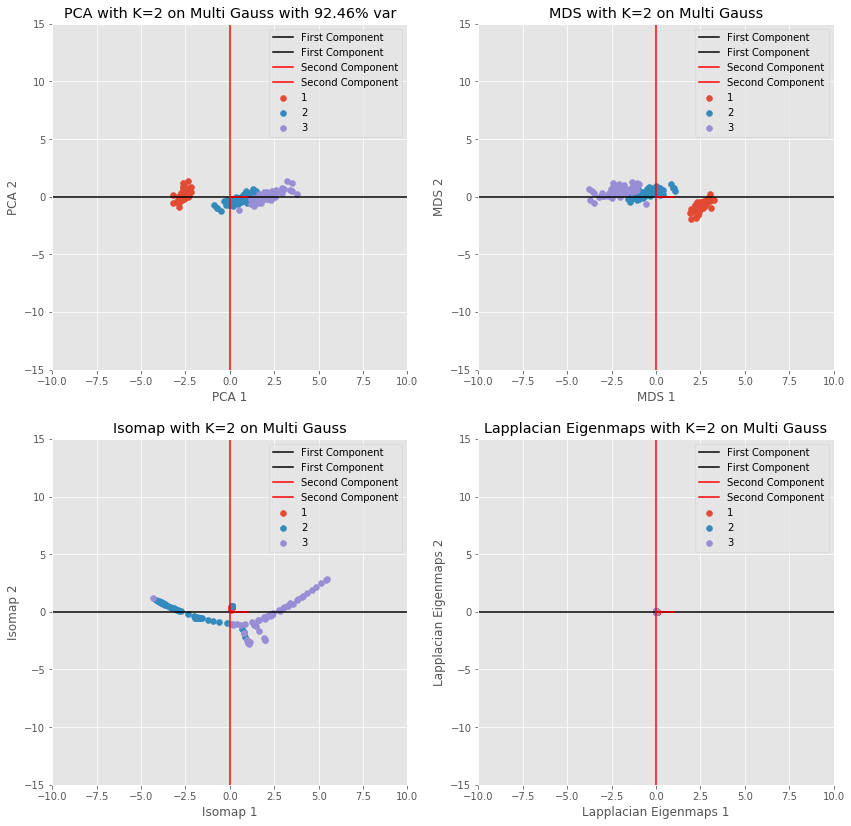

In [36]:
# Dataset
X, y = data, y

xaxis = 10
yaxis = 15

# Manifolds
pca = PCA(2)
var = pca.fit(X)
z_pca = var.transform(X)

mds = MDS(2)
z_mds = mds.fit_transform(X)

iso = Isomap(2)
z_iso = iso.fit_transform(X)

spec = SpectralEmbedding(2)
z_spec = spec.fit_transform(X)

# Figure
plt.style.use('ggplot')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(14,14))

# PCA
ax1.scatter(z_pca[y == 0][:,0], z_pca[y == 0][:,1], label='1')
ax1.scatter(z_pca[y == 1][:,0], z_pca[y == 1][:,1], label='2')
ax1.scatter(z_pca[y == 2][:, 0], z_pca[y == 2][:,1], label='3')
ax1.plot((-xaxis, xaxis), (0, 0), (0, 0), c='black', label="First Component")
ax1.plot((0, 0),(-yaxis, yaxis), (0, 0), c='red', label="Second Component")
ax1.legend(loc='upper right')
ax1.set_title("PCA with K=2 on Multi Gauss with {}% var".format(round(var.explained_variance_ratio_[0]*100, 2)))
ax1.set_xlabel('PCA 1')
ax1.set_ylabel('PCA 2')
ax1.set_xlim(-xaxis, xaxis)
ax1.set_ylim(-yaxis, yaxis)

# MDS
ax2.scatter(z_mds[y == 0][:,0], z_mds[y == 0][:,1], label='1')
ax2.scatter(z_mds[y == 1][:,0], z_mds[y == 1][:,1], label='2')
ax2.scatter(z_mds[y == 2][:, 0], z_mds[y == 2][:,1], label='3')
ax2.plot((-xaxis, xaxis), (0, 0), (0, 0), c='black', label="First Component")
ax2.plot((0, 0),(-yaxis, yaxis), (0, 0), c='red', label="Second Component")
ax2.legend(loc='upper right')
ax2.set_title("MDS with K=2 on Multi Gauss")
ax2.set_xlabel('MDS 1')
ax2.set_ylabel('MDS 2')    
ax2.set_xlim(-xaxis, xaxis)
ax2.set_ylim(-yaxis, yaxis)

# ISO
ax3.scatter(z_iso[y == 0][:,0], z_iso[y == 0][:,1], label='1')
ax3.scatter(z_iso[y == 1][:,0], z_iso[y == 1][:,1], label='2')
ax3.scatter(z_iso[y == 2][:, 0], z_iso[y == 2][:,1], label='3')
ax3.plot((-xaxis, xaxis), (0, 0), (0, 0), c='black', label="First Component")
ax3.plot((0, 0),(-yaxis, yaxis), (0, 0), c='red', label="Second Component")
ax3.legend(loc='upper right')
ax3.set_title("Isomap with K=2 on Multi Gauss")
ax3.set_xlabel('Isomap 1')
ax3.set_ylabel('Isomap 2')    
ax3.set_xlim(-xaxis, xaxis)
ax3.set_ylim(-yaxis, yaxis)

# Laplcian Eigenmaps
ax4.scatter(z_spec[y == 0][:,0], z_spec[y == 0][:,1], label='1')
ax4.scatter(z_spec[y == 1][:,0], z_spec[y == 1][:,1], label='2')
ax4.scatter(z_spec[y == 2][:, 0], z_spec[y == 2][:,1], label='3')
ax4.plot((-xaxis, xaxis), (0, 0), (0, 0), c='black', label="First Component")
ax4.plot((0, 0),(-yaxis, yaxis), (0, 0), c='red', label="Second Component")
ax4.legend(loc='upper right')
ax4.set_title("Lapplacian Eigenmaps with K=2 on Multi Gauss")
ax4.set_xlabel('Lapplacian Eigenmaps 1')
ax4.set_ylabel('Lapplacian Eigenmaps 2')    
ax4.set_xlim(-xaxis, xaxis)
ax4.set_ylim(-yaxis, yaxis)    

plt.show()

## 4D to 3D

/Users/timloehr/anaconda3/envs/datascience_projects/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


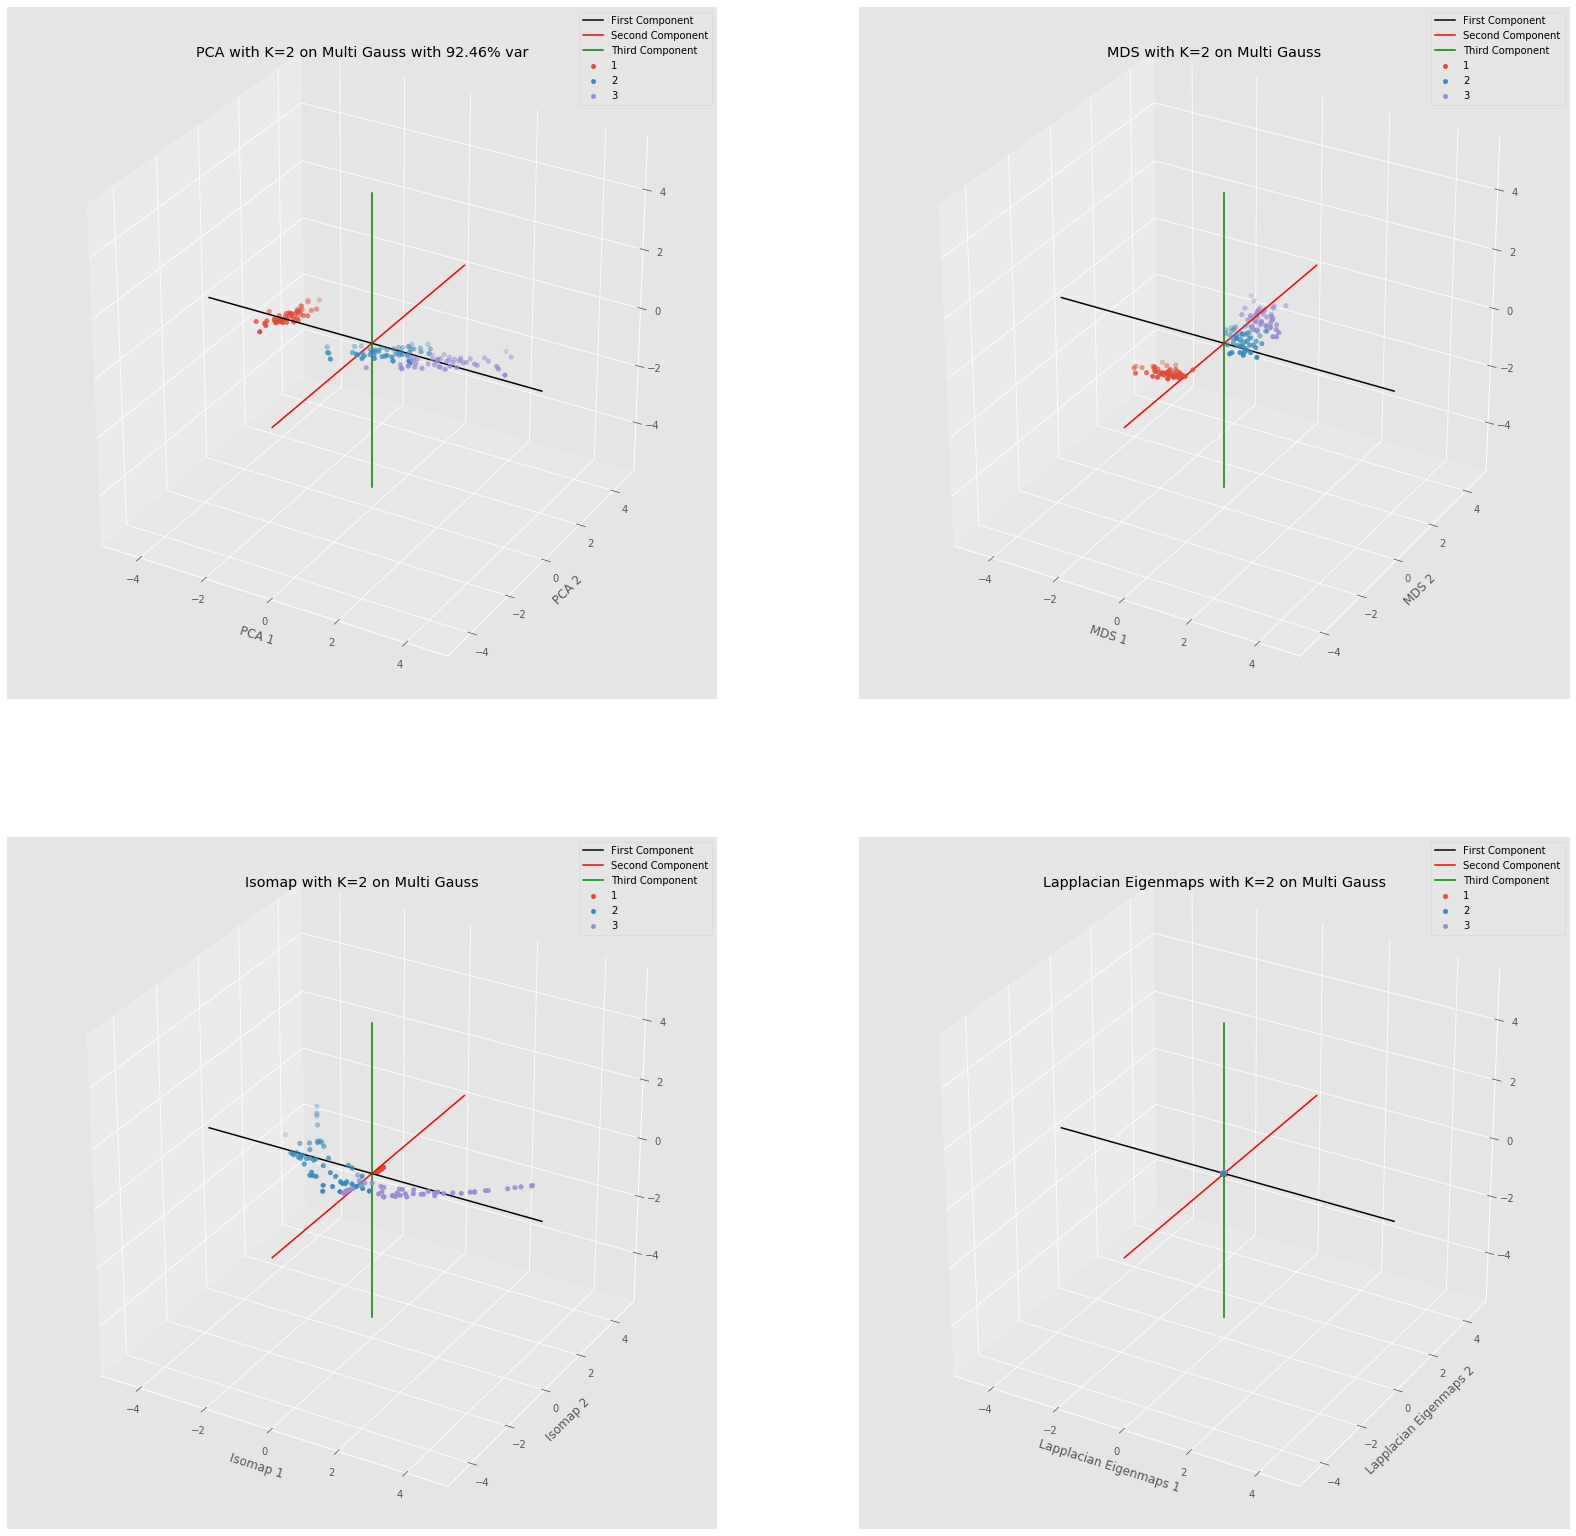

In [62]:
# Dataset
X, y = data, y

xaxis = 5
yaxis = 5

# Manifolds
pca = PCA(3)
var = pca.fit(X)
z_pca = var.transform(X)

mds = MDS(3)
z_mds = mds.fit_transform(X)

iso = Isomap(3)
z_iso = iso.fit_transform(X)

spec = SpectralEmbedding(3)
z_spec = spec.fit_transform(X)

# Figure
plt.style.use('ggplot')
fig = plt.figure(figsize=(28,28))
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222, projection='3d')
ax3 = fig.add_subplot(223, projection='3d')
ax4 = fig.add_subplot(224, projection='3d')

# PCA
ax1.scatter(z_pca[y == 0][:,0], z_pca[y == 0][:,1], label='1')
ax1.scatter(z_pca[y == 1][:,0], z_pca[y == 1][:,1], label='2')
ax1.scatter(z_pca[y == 2][:, 0], z_pca[y == 2][:,1], label='3')
ax1.plot((-xaxis, xaxis), (0, 0), (0, 0), c='black', label="First Component")
ax1.plot((0, 0),(-yaxis, yaxis), (0, 0), c='red', label="Second Component")
ax1.plot((0, 0), (0, 0), (-yaxis, yaxis), c='green', label="Third Component")
ax1.legend(loc='upper right')
ax1.set_title("PCA with K=2 on Multi Gauss with {}% var".format(round(var.explained_variance_ratio_[0]*100, 2)))
ax1.set_xlabel('PCA 1')
ax1.set_ylabel('PCA 2')
ax1.set_xlim(-xaxis, xaxis)
ax1.set_ylim(-yaxis, yaxis)

# MDS
ax2.scatter(z_mds[y == 0][:,0], z_mds[y == 0][:,1], label='1')
ax2.scatter(z_mds[y == 1][:,0], z_mds[y == 1][:,1], label='2')
ax2.scatter(z_mds[y == 2][:, 0], z_mds[y == 2][:,1], label='3')
ax2.plot((-xaxis, xaxis), (0, 0), (0, 0), c='black', label="First Component")
ax2.plot((0, 0),(-yaxis, yaxis), (0, 0), c='red', label="Second Component")
ax2.plot((0, 0), (0, 0), (-yaxis, yaxis), c='green', label="Third Component")
ax2.legend(loc='upper right')
ax2.set_title("MDS with K=2 on Multi Gauss")
ax2.set_xlabel('MDS 1')
ax2.set_ylabel('MDS 2')    
ax2.set_xlim(-xaxis, xaxis)
ax2.set_ylim(-yaxis, yaxis)

# ISO
ax3.scatter(z_iso[y == 0][:,0], z_iso[y == 0][:,1], label='1')
ax3.scatter(z_iso[y == 1][:,0], z_iso[y == 1][:,1], label='2')
ax3.scatter(z_iso[y == 2][:, 0], z_iso[y == 2][:,1], label='3')
ax3.plot((-xaxis, xaxis), (0, 0), (0, 0), c='black', label="First Component")
ax3.plot((0, 0),(-yaxis, yaxis), (0, 0), c='red', label="Second Component")
ax3.plot((0, 0), (0, 0), (-yaxis, yaxis), c='green', label="Third Component")
ax3.legend(loc='upper right')
ax3.set_title("Isomap with K=2 on Multi Gauss")
ax3.set_xlabel('Isomap 1')
ax3.set_ylabel('Isomap 2')    
ax3.set_xlim(-xaxis, xaxis)
ax3.set_ylim(-yaxis, yaxis)

# Laplcian Eigenmaps
ax4.scatter(z_spec[y == 0][:,0], z_spec[y == 0][:,1], label='1')
ax4.scatter(z_spec[y == 1][:,0], z_spec[y == 1][:,1], label='2')
ax4.scatter(z_spec[y == 2][:, 0], z_spec[y == 2][:,1], label='3')
ax4.plot((-xaxis, xaxis), (0, 0), (0, 0), c='black', label="First Component")
ax4.plot((0, 0),(-yaxis, yaxis), (0, 0), c='red', label="Second Component")
ax4.plot((0, 0), (0, 0), (-yaxis, yaxis), c='green', label="Third Component")
ax4.legend(loc='upper right')
ax4.set_title("Lapplacian Eigenmaps with K=2 on Multi Gauss")
ax4.set_xlabel('Lapplacian Eigenmaps 1')
ax4.set_ylabel('Lapplacian Eigenmaps 2')    
ax4.set_xlim(-xaxis, xaxis)
ax4.set_ylim(-yaxis, yaxis)    

plt.show()

## Self implemented PCA

In [7]:
data = pd.read_csv('irisdata.sec', sep=',', header=None)

names = data[4]
data = data.drop(columns=[4], axis=1)

mu = np.mean(data, axis=0)

Y = data - mu

Cov = 1/len(Y) * np.dot(Y.T, Y)

eigenvalues, eigenvectors = linalg.eig(Cov)

eigen = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvectors))]
# sort the eigenvalues to find the most important pairs
eigen.sort()
eigen.reverse()

explained_var = sum(eigenvalues)

for i, pair in enumerate(eigen):
    percent = round(pair[0]/explained_var,5)
    print("{:.2f}% explained variance in vector {}".format(percent*100, i))
    
percent_summed = np.cumsum(eigenvalues / explained_var)

92.46+0.00j% explained variance in vector 0
5.30+0.00j% explained variance in vector 1
1.72+0.00j% explained variance in vector 2
0.52+0.00j% explained variance in vector 3


/Users/timloehr/anaconda3/envs/datascience_projects/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


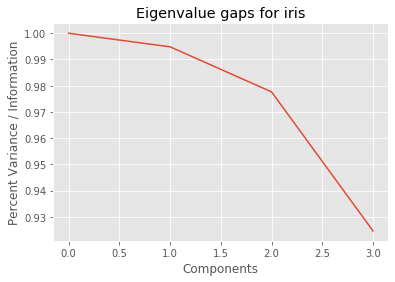

In [28]:
plt.plot(np.cumsum(eigenvalues)[::-1] / np.sum(eigenvalues))
plt.title("Eigenvalue gaps for iris")
plt.xlabel("Components")
plt.ylabel("Percent Variance / Information")
plt.show()

## 4D to 1D

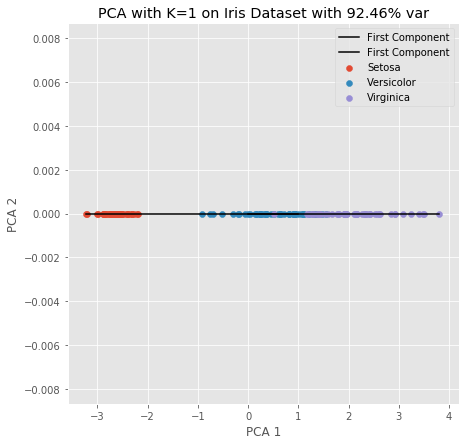

In [9]:
matrix_w_k2 = eigen[0][1].reshape(4,1)

Z_1 = np.array(Y.dot(matrix_w_k2))

plt.style.use('ggplot')

fig = plt.figure(1, figsize=(7,7))
ax = fig.add_subplot(111)

ax.scatter(Z_1[0:50,0], np.zeros(50), label='Setosa')
ax.scatter(Z_1[50:100,0], np.zeros(50), label='Versicolor')
ax.scatter(Z_1[100:150, 0], np.zeros(50), label='Virginica')

xAxisLine = ((min(Z_1[:,0]), max(Z_1[:,0])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], c='black', label="First Component")

ax.legend(loc='upper right')
ax.set_title("PCA with K=1 on Iris Dataset with 92.46% var")
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
            

plt.show()

## 4D to 2D

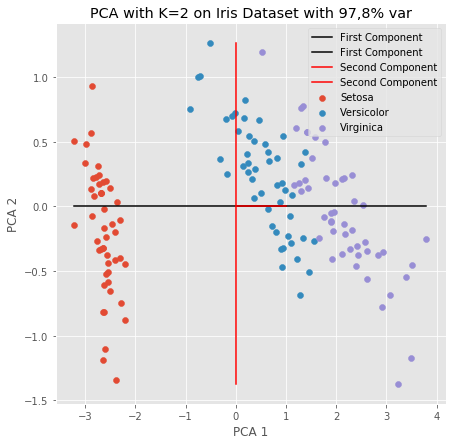

In [10]:
matrix_w_k2 = np.hstack((eigen[0][1].reshape(4,1), 
                         eigen[1][1].reshape(4,1)))

Z_2 = np.array(Y.dot(matrix_w_k2))

plt.style.use('ggplot')
fig = plt.figure(1, figsize=(7,7))
ax = fig.add_subplot(111)

ax.scatter(Z_2[0:49,0], Z_2[0:49,1], label='Setosa')
ax.scatter(Z_2[50:99,0], Z_2[50:99,1], label='Versicolor')
ax.scatter(Z_2[100:149, 0], Z_2[100:149,1], label='Virginica')

xAxisLine = ((min(Z_2[:,0]), max(Z_2[:,0])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], c='black', label="First Component")

yAxisLine = ((0, 0), (min(Z_2[:,1]), max(Z_2[:,1])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], c='red', label="Second Component")

ax.legend(loc='upper right')
ax.set_title("PCA with K=2 on Iris Dataset with 97,8% var")
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
            

plt.show()

## 4D to 3D

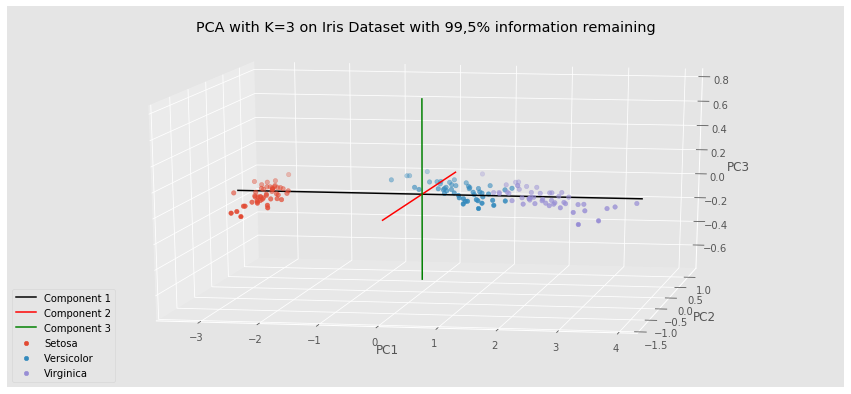

In [11]:
matrix_w_k3 = np.hstack((eigen[0][1].reshape(4,1), 
                         eigen[1][1].reshape(4,1),
                         eigen[2][1].reshape(4,1)))

Z_3 = np.array(Y.dot(matrix_w_k3))
plt.style.use('ggplot')

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Z_3[0:49,0], Z_3[0:49,1], label='Setosa')
ax.scatter(Z_3[50:99,0], Z_3[50:99,1], label='Versicolor')
ax.scatter(Z_3[100:149, 0], Z_3[100:149,1], label='Virginica')
 
xAxisLine = ((min(Z_3[:,0]), max(Z_3[:,0])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'black', label='Component 1')
yAxisLine = ((0, 0), (min(Z_3[:,1]), max(Z_3[:,1])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'red', label='Component 2')
zAxisLine = ((0, 0), (0,0), (min(Z_3[:,2]), max(Z_3[:,2])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'green', label='Component 3')
 
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA with K=3 on Iris Dataset with 99,5% information remaining")
ax.view_init(15, 280)
plt.legend(loc='lower left')
plt.show()